Group: P 

Rishita Mote (2018130029)

Bhargavi Poyekar (2018130040)



# DS ISE ASSIGNMENT TASK 3


# Diabetes Prediction using Machine Learning Models.


Importing libraries for data analysis


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

Connecting google drive and reading data from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
df = pd.read_csv('/content/drive/MyDrive/DS_ISE/diabetes.csv')

Mounted at /content/drive


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pima Indian Diabetes (PID) dataset:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. This dataset consists of 768 females at least 21 years old of Pima Indian Heritage. It consists of one target variable, Outcome and eight features such as pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, Diabetes Pedigree Function and Age.


In [ ]:
len(df)

768

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Right now the data is not showing any Null values, but after reading about the dataset, we came to understand that the null values are 0 in this dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From the above step, we can see that all the columns are of numerical data

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the above description of the dataframe, it is observed that the minimum values in Glucose, blood pressure, skin thickness, insulin and bmi is 0, which is not possible, hence it signifies missing values

In [ ]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols] = df[cols].replace(0,np.NaN)

We replaced 0 with Nan for these columns

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Now, we can see that there are many missing values in Skin thickness and Insulin

# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

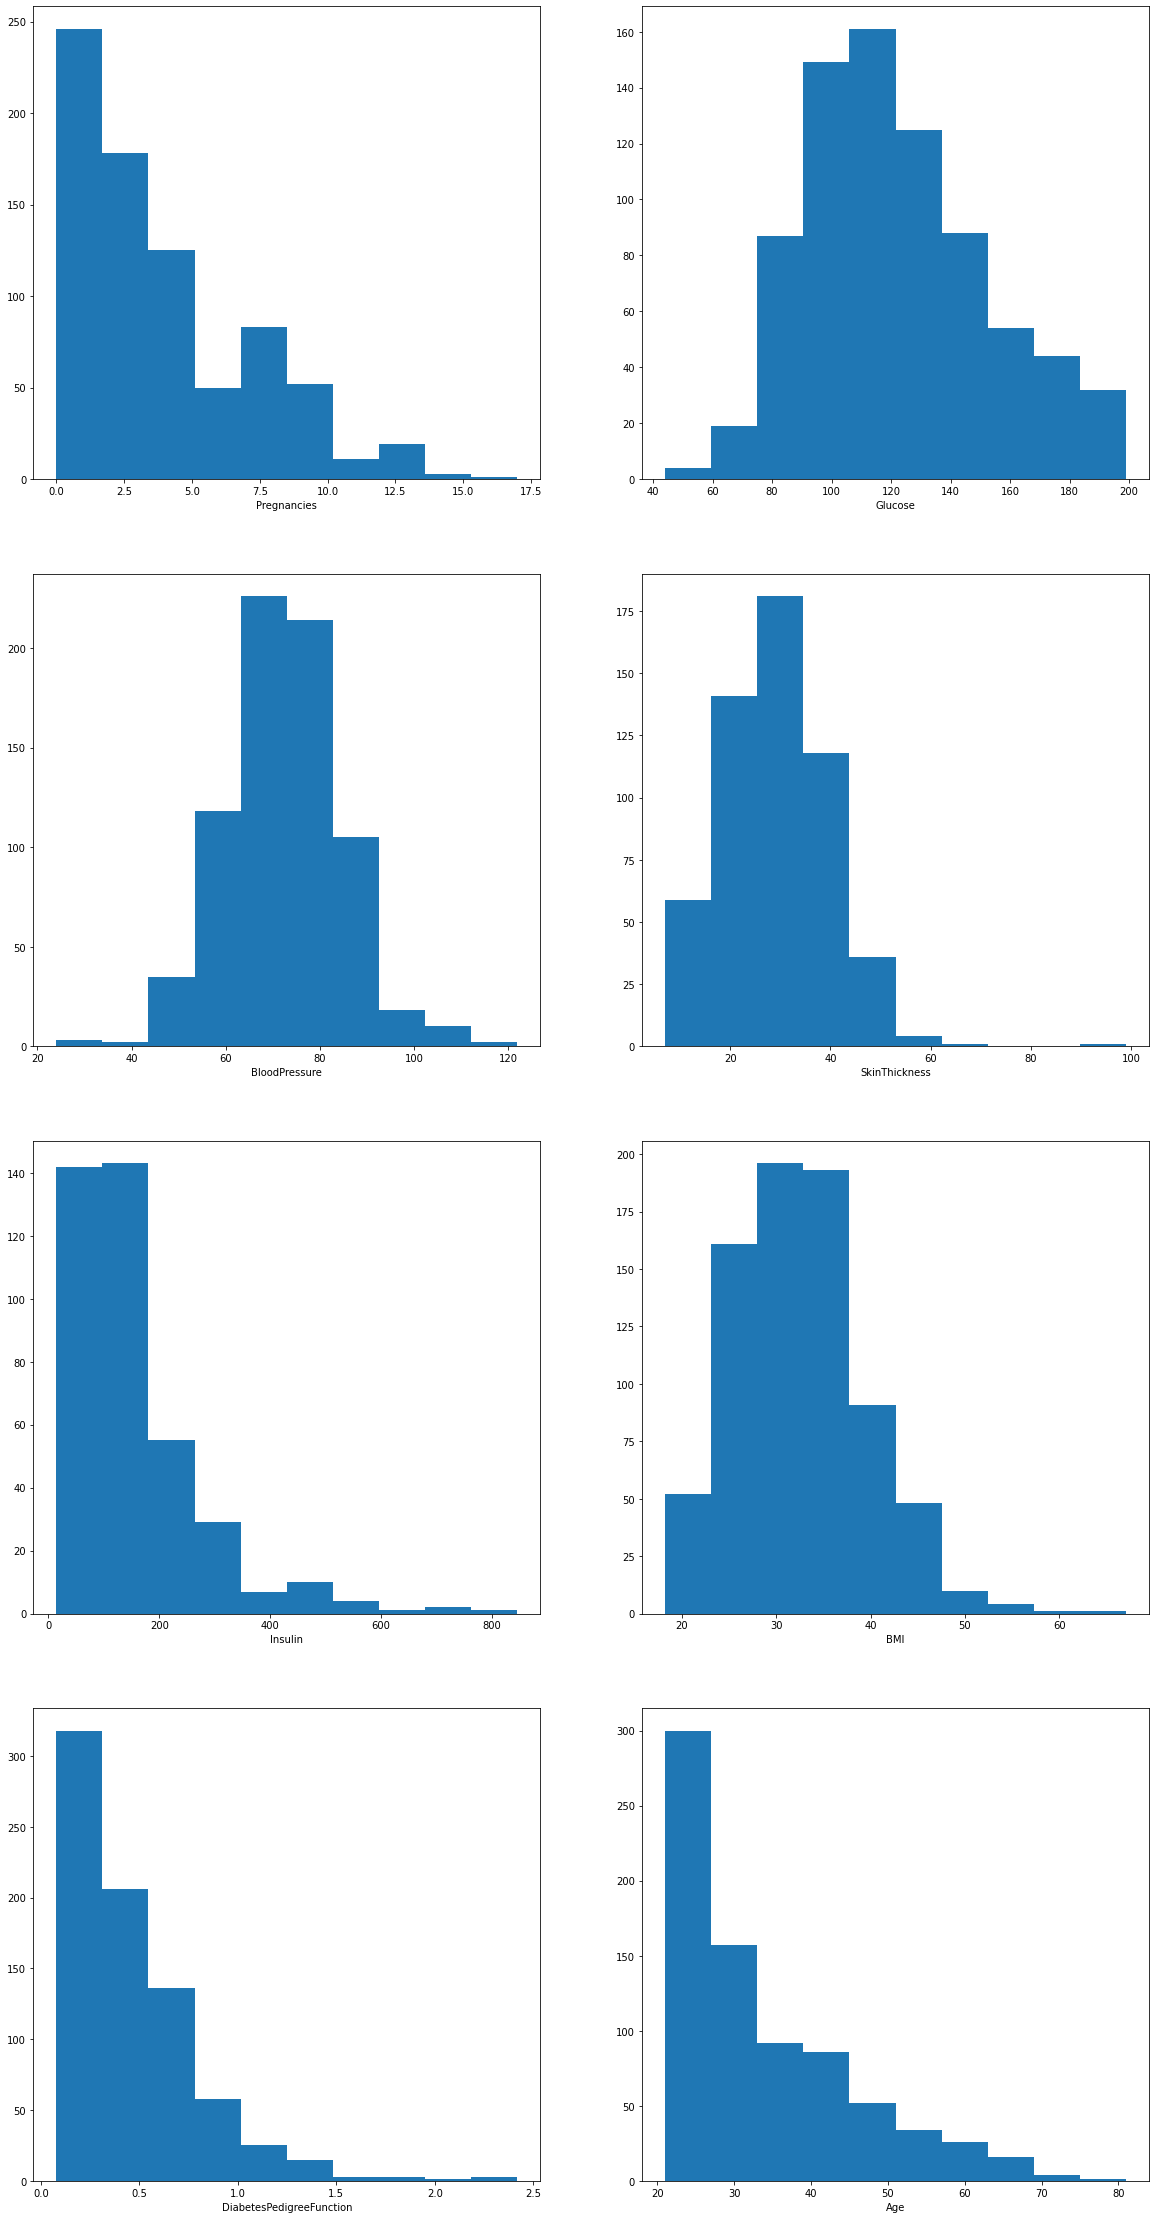

In [ ]:
plt.figure(figsize=(20,40))
col = df.columns
for i in range(0,8):
    plt.subplot(4,2,i+1)
    plt.hist(df[col[i]]);
    plt.xlabel(col[i])


Frome the above histogram plots, we could observe that majority of pregnancies range between 0-5, glucose between 100-140, blood pressure from 65-80, skin thickness between 20-40, insulin from 0-200, BMI between 30-40, and age between 20-30

# Outlier Detection

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



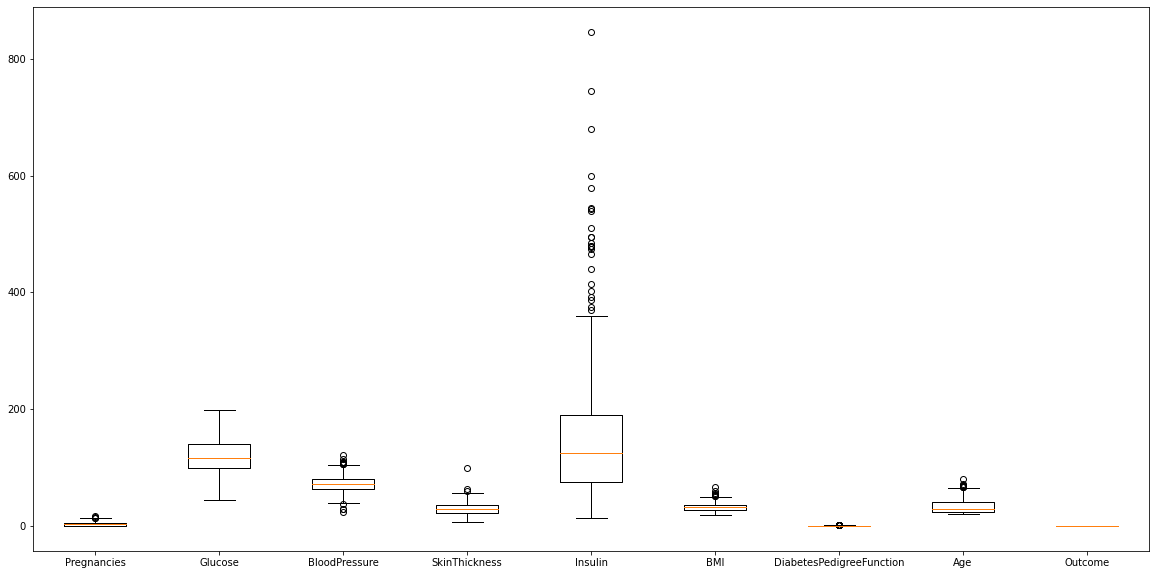

In [ ]:
plt.figure(figsize=(20,10))
plt.boxplot([vals.dropna() for col, vals in df.iteritems()]);
plt.xticks([1,2,3,4,5,6,7,8,9], df.columns);

Outliers, if not handled correctly, can
greatly affect the accuracy of a model. Hence they have to
be handled carefully. This Dataset has many
outliers, especially for the ‘Insulin’ attribute. Hence the
removal of these outliers can lead to a loss of important
information from the dataset.

In [ ]:
def treat_outliers():
    for col in df.columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        Lower_Whisker = Q1- 1.5*IQR
        Upper_Whisker = Q3+1.5*IQR
        df.loc[(df[col] > Upper_Whisker), col] = Upper_Whisker
        df.loc[(df[col] < Lower_Whisker), col] = Lower_Whisker
    
    


Handling outliers by replacing the upper and lower whiskers with
the upper and lower limit respectively. 

The mathematical
definition of the upper and lower limit is as follows:

upperlimit = Q3 + 1.5 ∗ IQR            eq (1)

lowerlimit = Q3 − 1.5 ∗ IQR            eq (2)

where Q3 and IQR stand for 3rd Quartile and Interquartile
Range respectively.



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



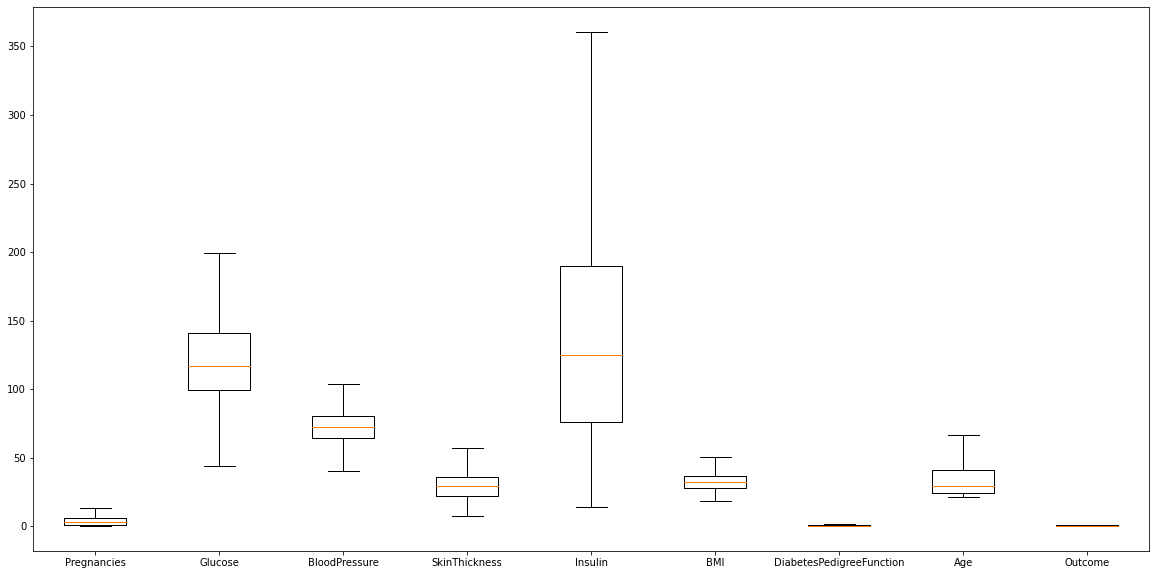

In [ ]:
plt.figure(figsize=(20,10))
treat_outliers()
plt.boxplot([vals.dropna() for col, vals in df.iteritems()]);
plt.xticks([1,2,3,4,5,6,7,8,9], df.columns);

From the above box plot, we can see that the oultiers have been handled.

# Missing Values

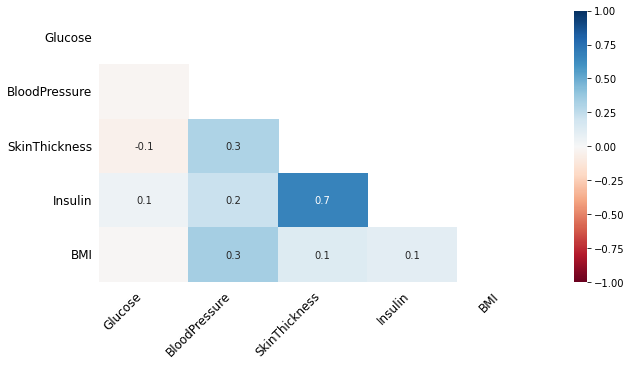

In [ ]:
import missingno
missingno.heatmap(df, figsize=(10,5), fontsize=12);

The features ‘Insulin’ and ‘Skin Thickness’ have maximum
missing values.

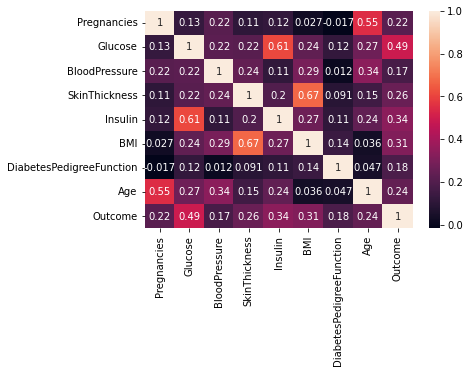

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
pd.DataFrame(df.groupby('Outcome').median()).loc[:,['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
Outcome,,,,,
0.0,107.0,70.0,27.0,102.5,30.1
1.0,140.0,74.5,32.0,169.5,34.3


These features show differences in their median values when
analyzed with respect to the ‘Outcome’ variable.


In [ ]:
for col in df.columns:
    df.loc[(df["Outcome"] == 0) & (df[col].isnull()), col] = df[df["Outcome"] == 0][col].median()
    df.loc[(df["Outcome"] == 1) & (df[col].isnull()), col] = df[df["Outcome"] == 1][col].median()

The missing values in a particular column are replaced by
the median value of that column, grouped by the ‘Outcome’
variable.

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Feature Extraction

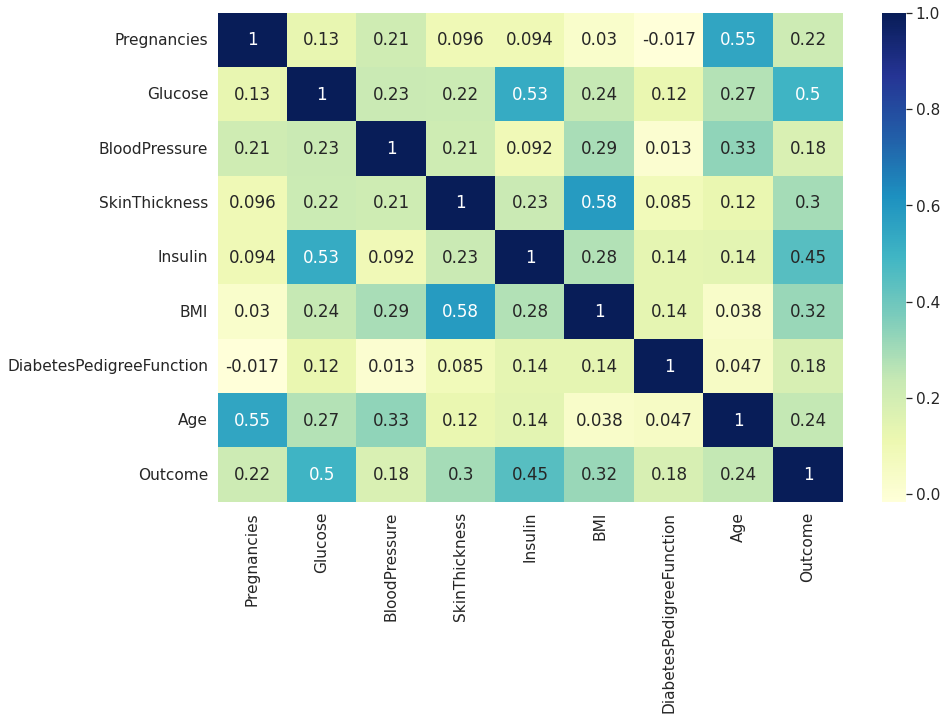

In [ ]:
corr = df.corr()
plt.figure(figsize=(14,9))
sns.set(font_scale=1.4)
g = sns.heatmap(corr,annot=True,cmap="YlGnBu");

The analysis of the correlation matrix shows that the ‘BMI’ and ‘Skin
Thickness’ have the highest correlation (0.58). Also, ‘Insulin’
and ‘Glucose’ have a correlation of 0.53.

In [ ]:
df['IG'] = df['Insulin'] * df['Glucose']
df['BS'] = df['BMI'] * df['SkinThickness']
df['BB'] = df['BMI'] * df['BloodPressure']

These feature pairs are combined to form new features

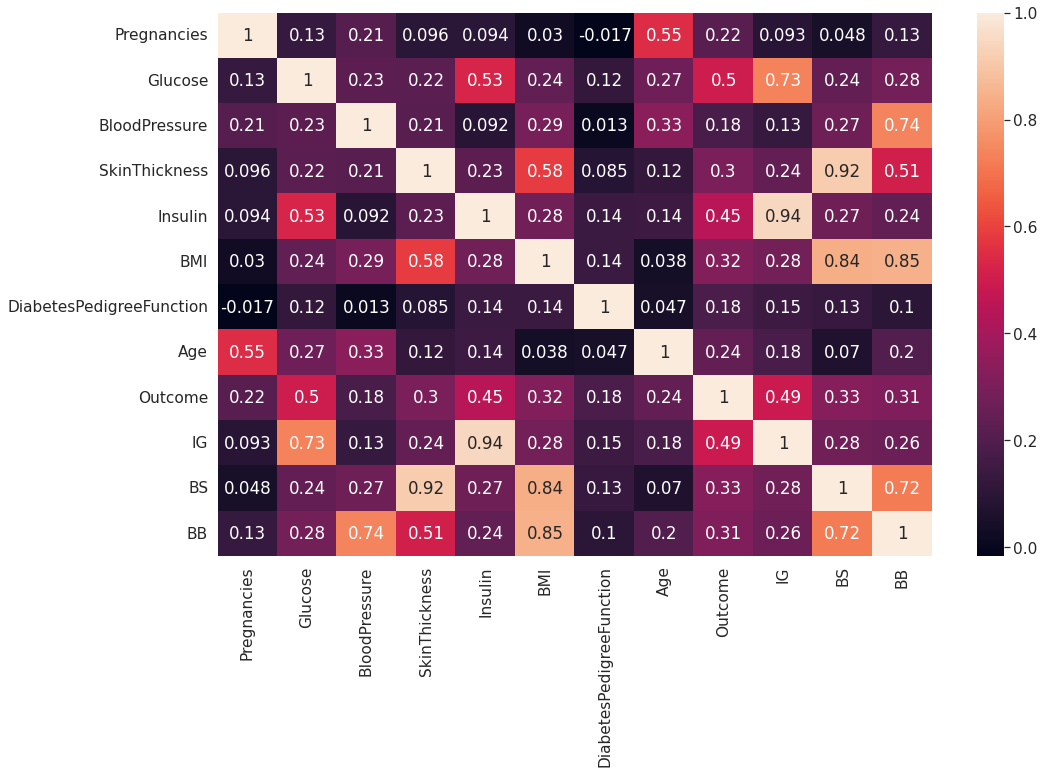

In [ ]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot=True)

The new feature ‘IG’ has a correlation of 0.49 with the
‘Outcome’ variable which is more than the correlation of
‘Insulin’ with ‘Outcome’ (0.45). Similarly, the feature ‘BS’
has a correlation of 0.33 with the ‘Outcome’ variable which is
more than the correlation of ‘Skin Thickness’ with ‘Outcome’
(0.3). Thus the two new features ‘IG’ and ‘BS’ are added to
the dataset.

In [ ]:
from sklearn import preprocessing

In [ ]:
def standard_scalar(dataframe, num_cols):
    std = preprocessing.StandardScaler()
    scaled = std.fit_transform(df[num_cols])
    return pd.DataFrame(scaled,columns=num_cols)



Then the dataset is standardized using StandardScalar. Standardization is a method in which each feature of the dataset
is standardized by removing the mean and scaling to unit
variance. Standardization is required when the features have different
scales and do not contribute equally to the model fitting thus
creating a bias during model training.

In [ ]:
pre_data = df.copy()

In [ ]:
#cat_cols = [col for col in df.columns if 12 >= len(df[col].unique()) > 2]

cat_cols   = [x for x in df.nunique()[df.nunique() < 12].keys().tolist() ]
#pre_data = one_hot_encoder(df,cat_cols)


In [ ]:
cat_cols

['Outcome']

Outcome is the only category column. category column is decided, if it has less than 12 unique values and more than 2

In [ ]:
pre_data.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,IG,BS,BB
0,1.0,0.647150,0.864625,-0.030829,0.700094,0.468509,0.184034,0.588927,1.445691,0.588562,0.469550,0.075494
1,0.0,-0.848970,-1.204727,-0.543685,-0.002745,-0.500680,-0.865690,-0.378101,-0.189304,-0.732883,-0.465344,-0.853832
2,1.0,1.245598,2.014265,-0.714637,0.348674,0.468509,-1.360560,0.746595,-0.103252,1.067352,-0.524959,-1.224107
3,0.0,-0.848970,-1.073339,-0.543685,-0.705584,-0.623637,-0.640749,-1.022787,-1.049828,-0.760847,-0.754407,-0.715190
4,1.0,-1.148194,0.503310,-2.766060,0.700094,0.446811,1.608659,2.596563,-0.017199,0.421500,1.237845,-0.898086


In [ ]:
pre_data.columns

Index(['Outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'IG', 'BS', 'BB'],
      dtype='object')

<AxesSubplot:>

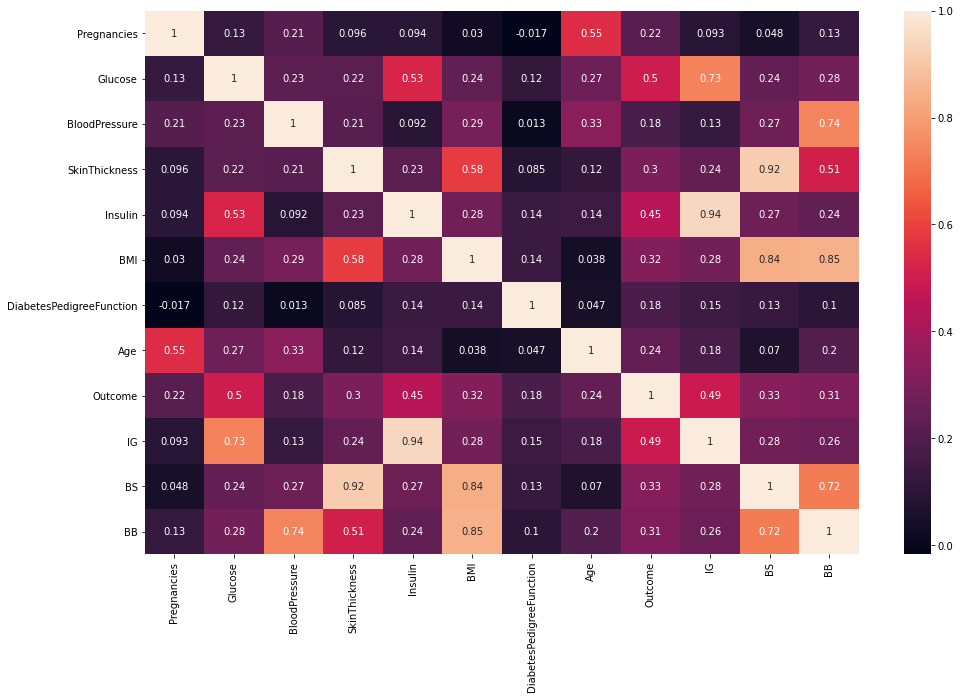

In [ ]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot=True)

# Model Training

The classification models like KNN and tree-based models like Decision Tree, Random
Forest, LGBM and Adaboost are used for Diabetes
Prediction.

In [ ]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score

In [ ]:
y = pre_data["Outcome"]
X = pre_data.drop(["Outcome"], axis=1)


Defining the X and y for prediction

In [ ]:
def evaluate(model):
    cv = KFold(n_splits=5,shuffle=True, random_state = 42)
    y_real = []
    y_proba = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1
    for train,test in cv.split(X,y):
        model.fit(X.iloc[train], y.iloc[train])
    
    # Confusion matrix
    y_pred = cross_val_predict(model, X, y, cv=5)
    conf_matrix = confusion_matrix(y, y_pred)
    print(conf_matrix)
    

The metrics scores for all the models are calculated
using cross-validation score for 5 folds. Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. 

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
  * Take the group as a hold out or test data set
  * Take the remaining groups as a training data set
  * Fit a model on the training set and evaluate it on the test set
  * Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

In [ ]:
def scores_table(model, subtitle):
    scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    res = []
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        res.append(scores)
    df = pd.DataFrame(res).T
    df.loc['mean'] = df.mean()
    df.loc['std'] = df.std()
    df= df.rename(columns={0: 'accuracy', 1:'precision', 2:'recall',3:'f1',4:'roc_auc'})
    print(df)


Accuracy- The percentage of correct predictions for the
test data is called the accuracy of the model. It is calculated
as the ratio of the number of correct predictions to the
total number of predictions. 

Precision- The ability of a classification model to identify only the relevant data points. Mathematically, precision the number of true positives divided by the number of true positives plus the number of false positives.

Recall- The ability of a model to find all the relevant cases within a data set. Mathematically, we define recall as the number of true positives divided by the number of true positives plus the number of false negatives. 

F1- The F1 score is defined as the harmonic mean of precision and recall.

Roc_Auc- Receiver Operating Characteristics
curve which is also known as ROC curve where False Positive
Rate (FPR) is plotted on the x-axis and True Positive Rate
(TPR) is plotted on the y-axis. The more the ROC curve closer
to the y-axis, the performance of the classifier is better. The
area under this ROC curve is known as AUC which is used
as one of the metrics for evaluating the performance of the
classifier.



## Decision Tree Classifier

Decision Tree is a tree-based supervised machine learning
model whose internal nodes are taken as test cases and leaf
nodes are taken as categories. This process is recursively
repeated for every subtree. The strategy used to split a node
affects the accuracy of the decision tree. The decision tree
splits the nodes by all the features in the dataset and then
selects the split which gives the most homogeneous sub-nodes.
Various algorithms like Information Gain, Gini Index, Gain
Ratio, etc. are used to select an appropriate feature for the split.

In [ ]:
cart_model = DecisionTreeClassifier(random_state=17)

In [ ]:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": [2, 3, 4]}

cart_cv = GridSearchCV(cart_model, cart_params, cv=10, n_jobs=-1, verbose=True)
cart_cv.fit(X,y)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': [2, 3, 4]},
             verbose=True)

* max depth- It can be described as the length of the longest path from the tree root to a leaf.

* min_samples_split- the minimum number of samples required to split an internal node

In [ ]:
cart_cv.best_params_

{'max_depth': 5, 'min_samples_split': 2}

In [ ]:
cart_tuned = DecisionTreeClassifier(**cart_cv.best_params_)

Evaluate and find the confusion matrix 

In [ ]:
evaluate(cart_tuned)

[[461  39]
 [ 59 209]]


In [ ]:
scores_table(cart_tuned, "Decision Tree")

      accuracy  precision    recall        f1   roc_auc
0     0.857143   0.785714  0.814815  0.771930  0.861111
1     0.883117   0.840000  0.703704  0.815534  0.931667
2     0.870130   0.869565  0.740741  0.808081  0.833981
3     0.869281   0.851064  0.754717  0.800000  0.931038
4     0.895425   0.865385  0.830189  0.862745  0.916226
mean  0.875019   0.842346  0.768833  0.811658  0.894805
std   0.013102   0.030200  0.047136  0.029502  0.039913


## Random Forest Classifier

Ensemble models combine multiple models in order to obtain
better prediction results. Random Forest is an ensemble model
which produces many trees in place of a single tree. It
then predicts the final class of the data point by calculating
the majority of votes obtained from each decision tree. Since
Random Forest combines many decision trees which are
prone to noise, it reduces the overall effect of noise thus
giving better results

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
random_for = RandomForestClassifier(random_state=17)
grid_search = GridSearchCV(estimator = random_for, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 4)
grid_search.fit(X,y)

* bootstrap- When training, each tree in a random forest learns from a random sample of the data points. The samples are drawn with replacement, known as bootstrapping, which means that some samples will be used multiple times in a single tree.

* max depth- It can be described as the length of the longest path from the tree root to a leaf.

* max_features- These are the maximum number of features Random Forest is allowed to try in individual tree.

* min_samples_leaf- Leaf is the end node of a decision tree. A smaller leaf makes the model more prone to capturing noise in train data. 

* min_samples_split- the minimum number of samples required to split an internal node

* n_estimators- This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower.

In [ ]:
grid_search.best_params_

In [ ]:
param_rf ={'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
#rf_tuned = RandomForestClassifier(**grid_search.best_params_)

In [ ]:
rf_tuned = RandomForestClassifier(**param_rf)

In [ ]:
evaluate(rf_tuned)

In [ ]:
scores_table(rf_tuned, "Random Forest")

In [ ]:
# test error
y_pred = rf_tuned.predict(X_test)
y_prob = rf_tuned.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred,digits=4))
roc_auc_score(y_test, y_prob)

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

## KNN

K Nearest Neighbours is a supervised learning model
in which a data point is classified based on majority class
among its K nearest neighbours. The proximity of data points is calculated by measuring the distance between
them. Euclidean, Hamming, or Manhattan distance is used
to calculate the distance between the data points. The value
of K is initialized to the chosen number of neighbors. The
distance between the test data point and every other data
point is calculated and sorted in ascending order by distance.
The first K entries from the sorted list are selected. Then
based on the most appearing class of these entries, a class is
assigned to the test data point.

In [ ]:
param_grid = {
      'n_neighbors': np.arange(20,30)
}

knn_clf = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator = knn_clf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 4)
grid_search_knn.fit(X, y)

In [ ]:
grid_search_knn.best_params_

In [ ]:
knn_tuned = KNeighborsClassifier(**grid_search_knn.best_params_)

In [ ]:
evaluate(knn_tuned)

In [ ]:
scores_table(knn_tuned, "KNN")

In [ ]:
# test error
y_pred_knn = knn_tuned.predict(X_test)
y_prob_knn = knn_tuned.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred_knn,digits=4))
roc_auc_score(y_test, y_prob_knn)

In [ ]:
best_grid_knn = grid_search_knn.best_estimator_
grid_accuracy_knn = evaluate(best_grid_knn, X_test, y_test)

In [ ]:
plot_roc_curve(knn_tuned,X_test, y_test)  
plt.show()

## LGBM

Light GBM is a gradient boosting framework which uses
leaf-wise strategy to grow trees and makes a split based on
the largest gain of variance. It uses two techniques like
Gradient-based One Side Sampling (GOSS) and Exclusive
Feature Bundling (EFB) for down sampling the data and
features.
GOSS is a down sampling method that down samples data
instances based on their gradients. Since data points with
small gradients are well trained and those with large gradients
are under trained, LightGBM randomly samples instances with
small gradients and retains instances with large gradients.


In [ ]:
class_weight = [None,'balanced']
boosting_type = ['gbdt']
num_leaves = [30,50,100,150] 
learning_rate = [0.02, 0.04, 0.06, 0.08]
max_bin = [500, 700, 1000]
param_test = dict(class_weight=class_weight, boosting_type=boosting_type, num_leaves=num_leaves, learning_rate =learning_rate, max_bin=max_bin)

* class_weight-  Weights associated with classes
* boosting type (gdbt) - traditional Gradient Boosting Decision Tree
* num_leaves- Maximum tree leaves for base learners.
* learning rate- the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

In [ ]:
lgbm_clf = lgbm.LGBMClassifier(random_state=42, silent=True, metric='None', n_jobs=4)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=42,
    verbose=True)

In [ ]:
grid_search.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(metric='None', n_jobs=4,
                                            random_state=42),
                   param_distributions={'boosting_type': ['gbdt'],
                                        'class_weight': [None, 'balanced'],
                                        'learning_rate': [0.02, 0.04, 0.06,
                                                          0.08],
                                        'max_bin': [500, 700, 1000],
                                        'num_leaves': [30, 50, 100, 150]},
                   random_state=42, scoring='accuracy', verbose=True)

In [ ]:
opt_parameters =  grid_search.best_params_
opt_parameters

{'num_leaves': 50,
 'max_bin': 1000,
 'learning_rate': 0.06,
 'class_weight': None,
 'boosting_type': 'gbdt'}

In [ ]:
opt_parameters =  grid_search.best_params_
lgbm_tuned = lgbm.LGBMClassifier(**opt_parameters)

In [ ]:
evaluate(lgbm_tuned)

[[467  33]
 [ 45 223]]


In [ ]:
scores_table(lgbm_tuned, "LGBM")

      accuracy  precision    recall        f1   roc_auc
0     0.883117   0.846154  0.814815  0.830189  0.942963
1     0.870130   0.793103  0.851852  0.821429  0.940556
2     0.883117   0.875000  0.777778  0.823529  0.950556
3     0.934641   0.957447  0.849057  0.900000  0.968491
4     0.921569   0.901961  0.867925  0.884615  0.957170
mean  0.898515   0.874733  0.832285  0.851952  0.951947
std   0.024966   0.054887  0.032282  0.033433  0.010133


## LGBM + KNN

Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

In [ ]:
knn_clf = KNeighborsClassifier()

voting_clf = VotingClassifier(estimators=[ 
    ('lgbm_clf', lgbm_tuned),
    ('knn', KNeighborsClassifier())], voting='soft', weights = [1,1])

params = {
      'knn__n_neighbors': np.arange(1,30)
      }

In [ ]:
grid_lgbmknn = GridSearchCV(estimator=voting_clf, param_grid=params, cv=10, verbose=4)

In [ ]:
grid_lgbmknn.fit(X, y)

Fitting 10 folds for each of 29 candidates, totalling 290 fits
[CV 1/10] END ............................knn__n_neighbors=1; total time=   0.1s
[CV 2/10] END ............................knn__n_neighbors=1; total time=   0.1s
[CV 3/10] END ............................knn__n_neighbors=1; total time=   0.1s
[CV 4/10] END ............................knn__n_neighbors=1; total time=   0.1s
[CV 5/10] END ............................knn__n_neighbors=1; total time=   0.1s
[CV 6/10] END ............................knn__n_neighbors=1; total time=   0.1s
[CV 7/10] END ............................knn__n_neighbors=1; total time=   0.1s
[CV 8/10] END ............................knn__n_neighbors=1; total time=   0.1s
[CV 9/10] END ............................knn__n_neighbors=1; total time=   0.1s
[CV 10/10] END ...........................knn__n_neighbors=1; total time=   0.1s
[CV 1/10] END ............................knn__n_neighbors=2; total time=   0.1s
[CV 2/10] END ............................knn_

GridSearchCV(cv=10,
             estimator=VotingClassifier(estimators=[('lgbm_clf',
                                                     LGBMClassifier(learning_rate=0.06,
                                                                    max_bin=1000,
                                                                    num_leaves=50)),
                                                    ('knn',
                                                     KNeighborsClassifier())],
                                        voting='soft', weights=[1, 1]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             verbose=4)

In [ ]:
grid_lgbmknn.best_params_

{'knn__n_neighbors': 27}

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors =27)

voting_clf = VotingClassifier (
        estimators = [('knn', knn_clf), ('lgbm', lgbm_tuned)],
                     voting='soft', weights = [1,1])

In [ ]:
evaluate(voting_clf)

[[466  34]
 [ 50 218]]


In [ ]:
scores_table(voting_clf, "LGBM+KNN")

      accuracy  precision    recall        f1   roc_auc
0     0.876623   0.843137  0.796296  0.819048  0.929815
1     0.870130   0.814815  0.814815  0.814815  0.931852
2     0.889610   0.893617  0.777778  0.831683  0.940000
3     0.921569   0.918367  0.849057  0.882353  0.960755
4     0.895425   0.862745  0.830189  0.846154  0.946604
mean  0.890671   0.866536  0.813627  0.838810  0.941805
std   0.017875   0.036488  0.024966  0.024360  0.011209


## ADABOOST

Adaptive Boost is an ensemble model which uses Boosting
technique. The main idea of Adaboost is to train weak
classifiers and integrate them to construct a strong classifier.
It gives more attention to the wrongly categorized
samples during the training process. All the data
instances are initialized with weight 1/N where N is the
total number of instances.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 1000],
    'learning_rate' : [0.001, 0.01,0.1,0.2,0.5],
}

In [ ]:
adaboost = AdaBoostClassifier(random_state=17)
grid_search_ada = GridSearchCV(estimator = adaboost, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 15)

In [ ]:
grid_search_ada.fit(X, y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=17), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=15)

In [ ]:
grid_search_ada.best_params_

{'learning_rate': 0.2, 'n_estimators': 300}

In [ ]:
ada_tuned = AdaBoostClassifier(**grid_search_ada.best_params_)

In [ ]:
evaluate(ada_tuned)

[[457  43]
 [ 55 213]]


In [ ]:
scores_table(ada_tuned, "ADABOOST")

      accuracy  precision    recall        f1   roc_auc
0     0.876623   0.830189  0.814815  0.822430  0.927778
1     0.857143   0.796296  0.796296  0.796296  0.906296
2     0.870130   0.854167  0.759259  0.803922  0.954259
3     0.869281   0.851064  0.754717  0.800000  0.939811
4     0.888889   0.833333  0.849057  0.841121  0.959811
mean  0.872413   0.833010  0.794829  0.812754  0.937591
std   0.010367   0.020637  0.035260  0.016792  0.019247


## ADABOOST + LGBM

In [ ]:
ada_clf = AdaBoostClassifier()
voting_clf2 = VotingClassifier(estimators=[ 
    ('lgbm_clf', lgbm_tuned),
    ('adaboost', ada_clf)], voting='soft', weights=[accuracy_score(y_test, lgbm_tuned.predict(X_test)),
                                              accuracy_score(y_test, ada_clf.predict(X_test))])

params = {
      'adaboost__n_estimators': [100, 200, 300, 1000],
      'adaboost__learning_rate' : [0.001, 0.01,0.1,0.2,0.5],
      }

In [ ]:
grid_adalgbm = GridSearchCV(estimator=voting_clf2, param_grid=params, cv=10,verbose=4)

In [ ]:
grid_adalgbm.fit(X, y)

In [ ]:
grid_adalgbm.best_params_

In [ ]:
#ada_tuned_lgbm = AdaBoostClassifier(learning_rate=0.01, n_estimators=1000)

voting_clf2 = VotingClassifier (
        estimators = [('adaboost', ada_tuned), ('lgbm', lgbm_tuned)],
                     voting='soft', weights = [0.872413, 0.898515])

In [ ]:
evaluate(voting_clf2)

[[467  33]
 [ 45 223]]


In [ ]:
scores_table(voting_clf2, "LGBM + ADABOOST")

      accuracy  precision    recall        f1   roc_auc
0     0.883117   0.846154  0.814815  0.830189  0.936296
1     0.870130   0.793103  0.851852  0.821429  0.935000
2     0.883117   0.875000  0.777778  0.823529  0.952963
3     0.934641   0.957447  0.849057  0.900000  0.969057
4     0.921569   0.901961  0.867925  0.884615  0.959245
mean  0.898515   0.874733  0.832285  0.851952  0.950512
std   0.024966   0.054887  0.032282  0.033433  0.013182


# Results

## Accuracy

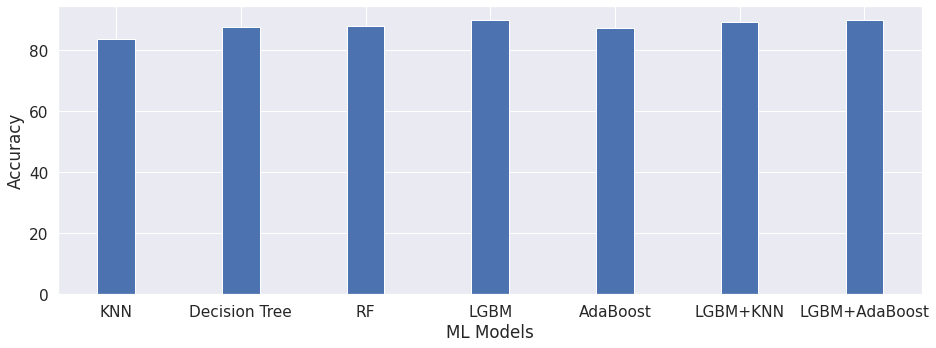

In [46]:
fig=plt.figure(figsize=(12, 4))
ax=fig.add_axes([0,0,1,1])

Models=['KNN','Decision Tree','RF','LGBM','AdaBoost','LGBM+KNN','LGBM+AdaBoost']
Accuracy=[83.72, 87.50, 87.76, 89.85, 87.24, 89.06, 89.85]
ax.bar(Models, Accuracy, width=0.3)
ax.set_xlabel('ML Models')
ax.set_ylabel('Accuracy')

plt.show()

LGBM model outperformed
all the other models with the highest accuracy of 89.85%.
It means that the LGBM model could correctly classify the
89.85% of the test cases given to is as a diabetic or a healthy
person.

## AUC

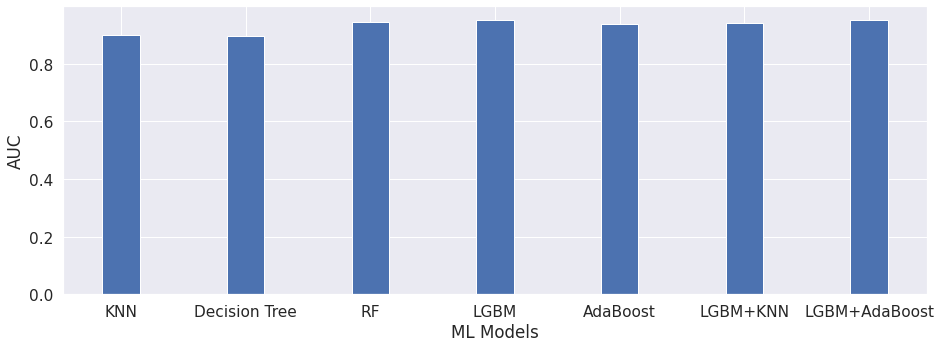

In [47]:
fig=plt.figure(figsize=(12, 4))
ax=fig.add_axes([0,0,1,1])

Models=['KNN','Decision Tree','RF','LGBM','AdaBoost','LGBM+KNN','LGBM+AdaBoost']
AUC=[0.9008,0.8948, 0.9445,0.9519, 0.9375, 0.9418,0.9505 ]
ax.bar(Models, AUC, width=0.3)
ax.set_xlabel('ML Models')
ax.set_ylabel('AUC')

plt.show()

AUC value of 0.95 for the
LGBM classifier is the highest amongst all the classifiers.
This value of AUC suggests that the model is capable of
distinguishing between the classes of diabetic and healthy
people. The larger value of AUC shows that the FPR is lower
which means Type-I error is less.

# Conclusion

* We trained various ensemble models, tree based models
and KNN for diabetes prediction using the Pima dataset. 
* The dataset contained many missing values and outliers which were
carefully handled in our tutorial. 
* Correlation based feature selection method improved the performance of
the model. 
* Hyperparameter tuning was of utmost importance in order to improve the performance of the model. 
* Tuned LGBM outperformed all the models with 89.85% accuracy.
* The validation of the model was done using five fold cross validation.